In [1]:
import numpy as np

x = 0

In [2]:
state = np.random.uniform(size=[4,2])
x = np.array([-1, 1])
state

array([[0.09035031, 0.88518719],
       [0.14369446, 0.60876171],
       [0.82044282, 0.51089979],
       [0.01881955, 0.02242955]])

In [3]:
state[:-1] = state[1:]
state[-1] = x
state

array([[ 0.14369446,  0.60876171],
       [ 0.82044282,  0.51089979],
       [ 0.01881955,  0.02242955],
       [-1.        ,  1.        ]])

In [4]:
def square_loss(x, y):
    return (x - y)**2
    

In [5]:
class SimpleSequencePredictor:
    def __init__(self):
        self.last = 0
    # Does not do anything here
    # You should implement something where data is a sequence of Xs
    # There are no explicit targets
    def fit(self, data):
        pass
    def predict(self):
        return self.last
    # Here you should save the data somehow and push it in the window
    # You can use the new data to adapt the model, but that is too complicated.
    def observe(self, x):
        self.last = x


In [6]:
def evaluate_predictor(model, train, test, loss):
    model.fit(train)
    error = 0
    for t in range(len(test)):
        y = model.predict()
        error += loss(y, test[t])
        model.observe(test[t])
    return np.mean(error)

In [7]:
# Test with Gaussian time series
from time_series_generators import *


In [8]:
gts = LinearGaussianTimeSeries(0.1,5)
T = 100
train = np.zeros(T)
for t in range(T):
    train[t] = gts.generate()
test = np.zeros(T)
for t in range(T):
    test[t] = gts.generate()



In [9]:
predictor = SimpleSequencePredictor()
print("Error: ", evaluate_predictor(predictor, train, test, square_loss))

Error:  1.4975077540492219


In [10]:
def make_X_y(data, order):
    T = data.shape[0]
    n = data.shape[1]
    X = np.zeros([T - n - 1, n * order])
    y = np.zeros([T - n - 1, n])
    for t in range(T - order - 1):
        X[t] = data[t:t+order].reshape(-1)
        y[t] = data[t+order+1]
    return X, y

In [11]:
from sklearn.linear_model import LinearRegression
class NeuralSequencePredictor:
    def __init__(self, n_features, order):
        self.n_features = n_features
        self.order = order
        self.window = np.zeros([n_features, order])
        self.network = LinearRegression()
    # Here you should initialise a neural network from sklearn
    # Fit the training data
    # Since we want to use the sklearn procedure, then we need to re-arrange the training data 
    # somehow in order for us to fit the model properly?
    def fit(self, data):
        X, y = make_X_y(data, self.order)
        self.network.fit(X, y)
    def predict(self):
        return self.network.predict(self.window)
    # Here you should save the data somehow
    # You can use the new data to adapt the model,
    # but at the moment, just push the data in the window
    def observe(self, x):
        self.window[:-1] = self.window[1:]
        self.window[-1] = x


In [12]:
reg = LinearRegression()

In [17]:
data = train.reshape(-1,1)
model = NeuralSequencePredictor(1, 5)
model.fit(data)

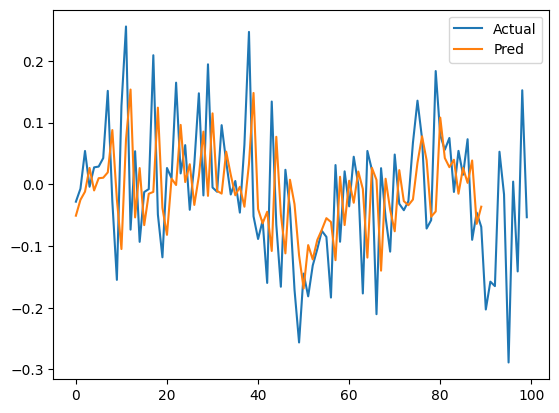

In [19]:
prediction = np.zeros(90)
for t in range(90):
    prediction[t] = model.predict()
    #    print ("a: ", prediction[t] , "x:", data[t])
    model.observe(data[t])
import matplotlib.pyplot as plt
plt.plot(data)
plt.plot(prediction)
plt.legend(["Actual", "Pred"])

In [15]:
X


NameError: name 'X' is not defined

In [ ]:
y